# Содержание:
* [Распределения](#Распределения)
    * [Нормальное распределение](#Нормальное-распределение)
    * [Cтандартное нормальное распределение](#Cтандартное-нормальное-распределение)
* [Доверительные интервалы](#Доверительные-интервалы)
    * [CI для среднего](#CI-для-среднего)
    * [CI для доли или вероянтности](#CI-для-доли-или-вероянтности)
* [Тестирование гипотез](#Тестирование-гипотез)
    * [Z-тест](#Z-тест)
    * [T-тест](#T-тест)

## Распределения

### Нормальное распределение

Рассмотрим саммую классическую задачу по терверу: ковбой стреляет по мишеням на протяжении года каждый день по 100 выстрелов. С вероятностью 0.5 ковбой попадет по мишени. Нас интересует вопрос: как будет выглядеть распредение количества попаданий по мишеням? Давайте попробуем визулизировать данную ситуацию 

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Какие мы выводы можем отсюда сделать? Если взять, например, наблюдения и распределение выстрелов стрелка за один год получется что-то странное,

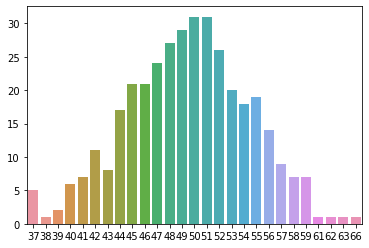

In [2]:
days = 365*1
shots = 100
info = dict()

for _ in range(days):
    hits = 0
    for _ in range(shots):
        hits += np.random.choice([0, 1])
    info.setdefault(hits, 0)
    info[hits] += 1
    
sns.barplot(x=list(info.keys()), y=list(info.values()));

Но если мы значительно увеличим количество наблюдаемых лет (в идеале при стремлении к бесконечности), то наше распрделение примет осязаемую форму

In [9]:
days = 365*100
shots = 100
info = dict()

for _ in range(days):
    hits = 0
    for _ in range(shots):
        hits += np.random.choice([0, 1])
    info.setdefault(hits, 0)
    info[hits] += 1
    

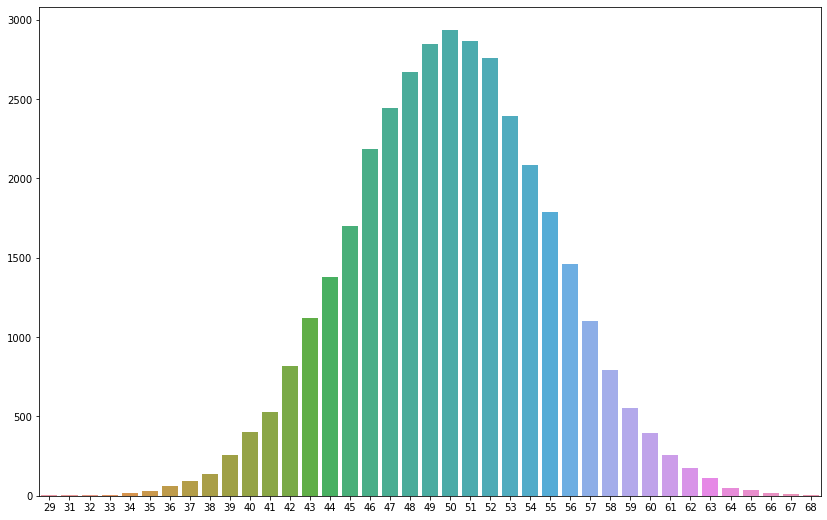

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14,9))

sns.barplot(x=list(info.keys()), y=list(info.values()), ax=ax);

Из исходных данных E(x) = 100 * 0.5 = 50, что совпадает с максимальный частотой суммы попаданий. Теперь мы получили что-то более похоже на это загадочное нормальное распределние. Теперь разберемся, что же оно из себя пресдтваляет в формальном варианте

**Обозначение** 

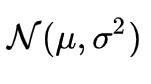

Где $\mu$ - математическое ожидание E(x), a $\sigma^2$ - дисперсия Var(x) или стаднартное отклонение в квадрате $\sigma$

**Формула**

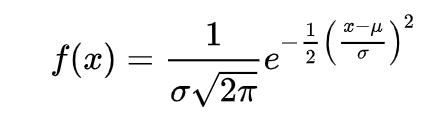

Рассмотрим пример:

In [2]:
def norm_dist (data, mean, sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((data-mean)/sd)**2)
    return prob_density

In [3]:
data = np.linspace(1,10, 100)
mean = np.mean(data)
sd = np.std(data)

In [4]:
data

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

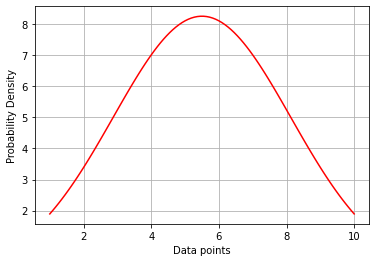

In [5]:
plt.plot(data, norm_dist(data, mean, sd) , color='red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.grid();

Теперь посмотрим, как изменение параметров распределения $\mu$ и $\sigma^2$ влияет на форму его изображения

Так как наблюдение с наибольшей частотой лежит в центре и является матожиданием, то уменьшение или увеличение парматера $\mu$, будет сдвигать выборку влево или вправо соответственно

Теперь обратим внимание на изменение стандартного отклонения

In [6]:
import scipy.stats as sps

In [7]:
X = sps.norm(loc=0, scale=1).rvs(size=200) #мы сгенерировали выборку с мат ожиданием 0 и дисперсией 1 из 200 элементов
# loc - отвечает за мат ожидание
# scale - за стандартное отклонение

In [8]:
X # посмотрим, что лежит внутри

array([ 1.10538038, -1.65047011, -0.07234585,  1.34201056, -0.47056317,
       -0.12110582,  0.077947  , -1.75559824, -0.90202466, -1.76317586,
       -0.45416103, -0.76749867, -0.37177048,  0.36657244,  1.72542398,
       -0.87816449, -1.04435995,  1.3277342 , -0.46845845,  1.32862172,
        0.7466794 ,  0.71757829, -0.63433551,  1.25761898, -0.5897194 ,
        1.15801324, -0.5261719 ,  0.11576507, -0.66321369, -0.51908291,
        0.23134301,  0.02903487,  3.4539568 , -0.02696402, -0.80302931,
       -1.03134051,  0.35888441,  0.28456695, -1.27519164,  1.5966542 ,
       -0.37623841, -1.99487757, -0.25156973,  1.39656629,  1.84764561,
        0.44955276, -0.05738339, -1.28646625, -1.26058883,  0.2822692 ,
       -1.88663343,  0.67958706, -0.561925  , -1.19322909, -1.47096725,
       -0.27812204,  0.61322939, -0.51024374,  0.52669107, -0.17851608,
       -1.59114391,  1.27016033,  1.07261159, -0.42077377, -2.07321663,
       -0.09857008, -2.52657299,  0.14752002,  0.08888162, -0.11

In [9]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()
    
#источник: https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html
#рекомендую поизучать, чтобы углубить знания в работе с выборками и распределениями 

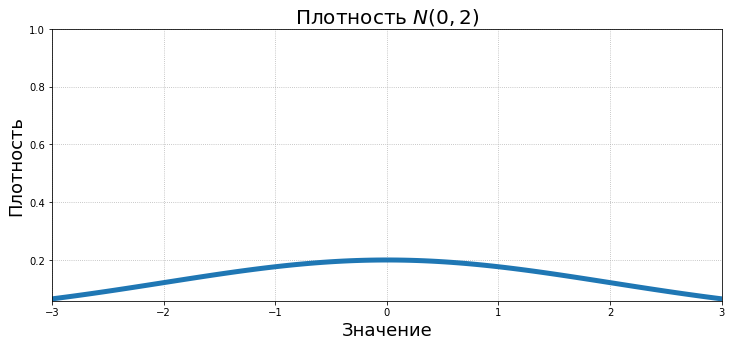

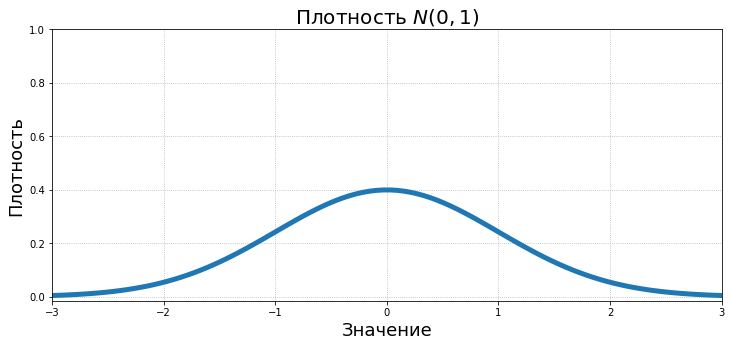

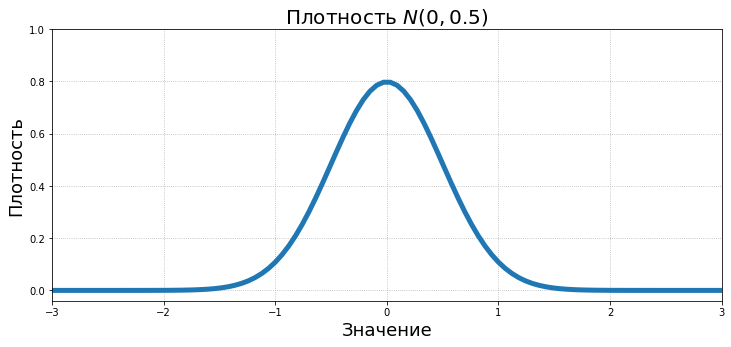

In [10]:
show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=1, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=2
)

show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=1, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=1
)

show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=1, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=0.5
)

По рисункам видно, что уменьшение диспресии, делает выборку более сконцентрированной к центру (рис 3), а ее увеличение делает ее более плоской и прижатой к оси х (рис 2)

**Практика**

Мы знаем, что рост взрослого человека - это случайная величина, которая нормально распрделена 

In [11]:
data = np.arange(150, 200, 0.1) #генерируем все возможные значения роста

In [12]:
pdf = sps.norm.pdf(data, loc=173, scale=10) 
#ставим каждому росту в соответстиве значение плотности с матождианием 173 и дисперсией 10

In [13]:
import seaborn as sns

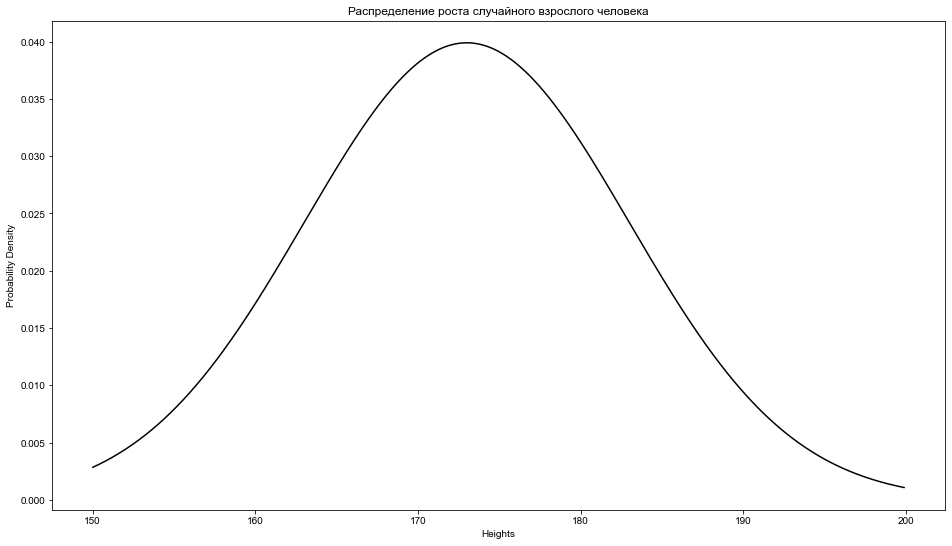

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
sns.set_style('whitegrid')
sns.lineplot(x=data, y=pdf, color='black', ax=ax)
plt.xlabel('Heights')
plt.ylabel('Probability Density')
plt.title('Распределение роста случайного взрослого человека')
plt.grid;

Найдем вероятность того, что рост человека будет меньше 160 см

In [15]:
dist = sps.norm(loc=173, scale=5)

In [16]:
dist.cdf(165)

0.054799291699557974

Найдем вероятность того, что рост человека будет от 170 до 180

In [17]:
dist.cdf(180) - dist.cdf(170)

0.6449902230161553

Надите вероятность того, что рост человека будет больше 175

In [2]:
#solution

**Идем дальше...**

### Cтандартное нормальное распределение

Нормальное распределение с параметрами N(0,1) называют стандартным нормальным, a.k.a *z* - распределение


Любое нормальное распределение можно привести к стандартному нормальному распределение выполнив следующую операцию:

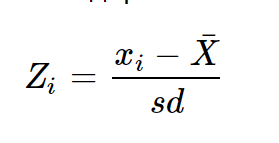

*sd - standard deviation, оно же стандартное отклонение*

Из каждого элемента выборки вычитаем среднее и делим на стандартое отклонение, чтобы получить стандартное нормальное распределение 

**Зачем оно существует**

    Z - распределение позволяет сравнивать выборки с учетом средних значений и стандартных отклонений

    При работе с множеством признаков нормализация позволяет улучшить восприятие и качество интерпритируемых результатов 

*Пример*:

Студенты учатся у двух разных преподавателей, у которых немного разный подход к подаче материалов в контрольным (один из них более лояльный, другой строже)((надо же маме доказать, что ты не так плох по сравнению с сыном ее подруги)) . Определите кто из них двоих умнее 

In [19]:
group1_grades = np.array([57, 73, 23, 51, 43, 47, 44, 42, 42, 39, 65, 50, 54, 48, 46, 33, 37])
group2_grades = np.array([82, 76, 68, 77, 79, 69, 59, 62, 67, 72, 79, 85, 92, 100, 93, 75, 77])

In [20]:
np.std(group1_grades)

11.338454640435705

In [21]:
Petrov = group1_grades[0] #57 баллов
Sidorov = group2_grades[0] #82 балла

In [22]:
def normalize(data: np.array) -> np.array:
    return np.asarray(list(map(lambda x: (x - np.mean(data))/np.std(data), data)))

In [23]:
normalize(group1_grades)

array([ 0.90789424,  2.31902128, -2.09075073,  0.3787216 , -0.32684193,
        0.02593984, -0.23864649, -0.41503737, -0.41503737, -0.67962369,
        1.61345776,  0.29052616,  0.64330792,  0.11413528, -0.0622556 ,
       -1.20879633, -0.85601457])

In [24]:
normalize(group2_grades)

array([ 0.45264507, -0.11040124, -0.86112965, -0.01656019,  0.17112192,
       -0.7672886 , -1.70569911, -1.42417596, -0.9549707 , -0.48576544,
        0.17112192,  0.73416823,  1.39105559,  2.141784  ,  1.48489664,
       -0.20424229, -0.01656019])

In [25]:
Petrov_norm = normalize(group1_grades)[0]
Sidorov_norm = normalize(group2_grades)[0]

In [26]:
print(f'Petrov: {Petrov} vs {Petrov_norm:.2} \nSidorov: {Sidorov} vs {Sidorov_norm:.2}')

Petrov: 57 vs 0.91 
Sidorov: 82 vs 0.45


Мораль: несмотря на то, что у Петрова балл меньше, чем у Сидорова, мы не можем с уверенностью утверждать что Сидоров умнее

## Доверительные интервалы

Попробуем интуитивно понять, что такое доверительный интервал и логику их выведения

**Формальное определение:** Доверительный интервал (CI) -  отрезок, покрывающий оценочную статистику с определенной долей вероятности (или надежностью)

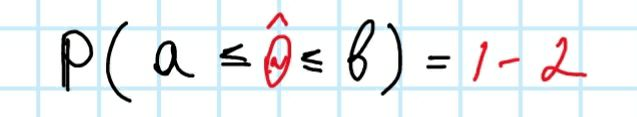

Где $\alpha$ - вероятность, $\theta$ - какой-нибудь оцениваемый нами параметр выборки

Например, это может быть математическое ожидание, тогда для этого парамметра определение прозвучит так: $\mu$ попадает в отрезок от a до b с вероятностью $\alpha$, что является доверительным интервалом для математического ожидания с уровнем доверия $\alpha$

Попробуем понять логику, как выводятся доверительные интервалы на примере математического ожидания 

### CI для среднего

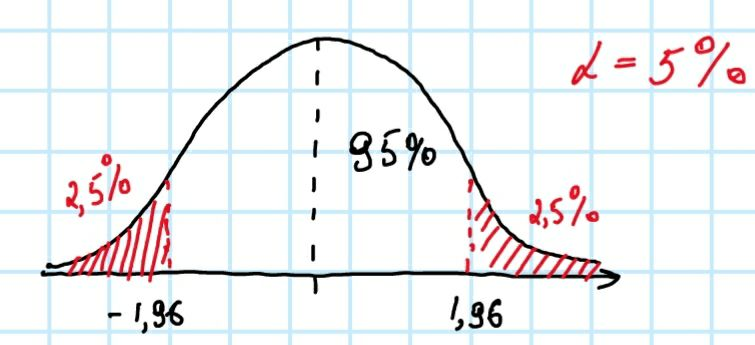

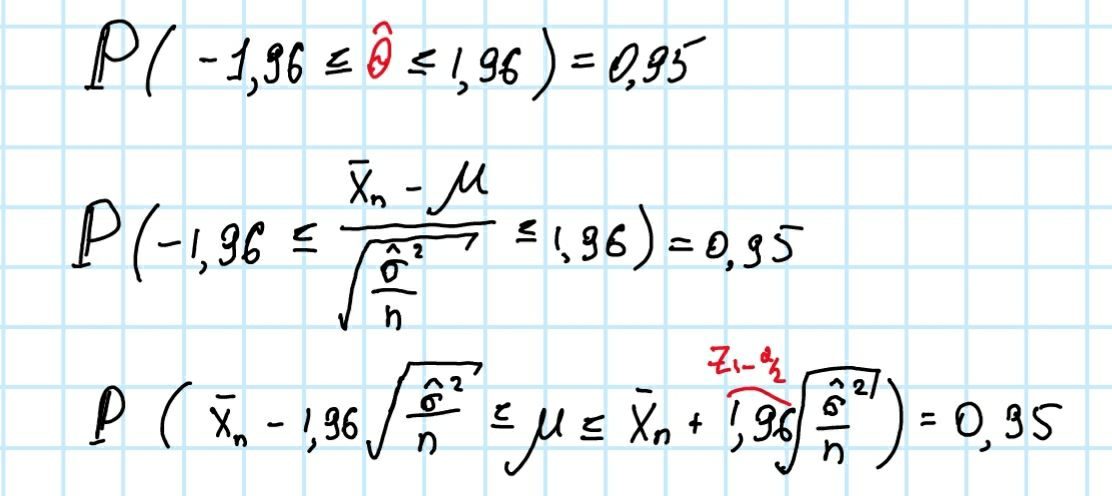

Запишем теперь это в общем виде:


$$
\begin{aligned}
& P(X_{mean} - z_{1 - \frac{\alpha}{2}}\sqrt{\frac{\sigma^2}{n}} \leq \mu \leq  X_{mean} + z_{1 -\frac{\alpha}{2}}\sqrt{\frac{\sigma^2}{n}}) = 1 - \alpha
\end{aligned}
$$


$$
\begin{aligned}
& \text{где } \sigma^2 = \frac{\sum\limits_{i=1}^{n}(X_i - X_{mean})^{2}}{n - 1}
\end{aligned}
$$

**Задача 1**

Говорят IQ тоже нормально распределен
1. Сгенерируйте выборку по распределению IQ из 1000 объектов , если известно, что $\mu$ = 100, $\sigma$ = 15
2. Найдите вероятность, что случайно взятый человек из выборки будет иметь IQ меньше 90
3. Какая вероятность, что сидящий рядом человек, будет иметь IQ больше 120
4. Постройте 99%-й и 95%-й доверительный интервал для математического ожидания IQ

In [28]:
#solution

**Задача 2**

Вернемся к нашему примеру с возрастом и нормальным распределением

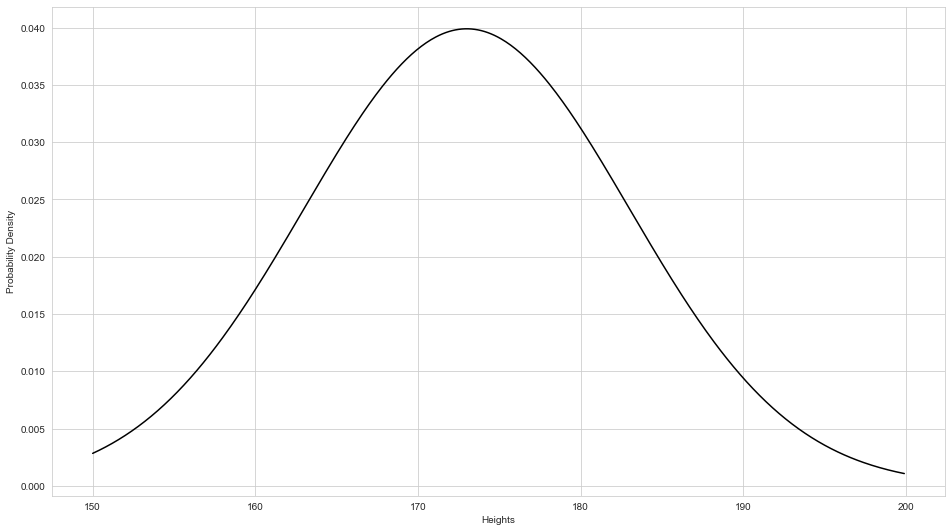

In [36]:
data = np.arange(150, 200, 0.1) #генерируем все возможные значения роста
pdf = sps.norm.pdf(data, loc=173, scale=10) 
#ставим каждому росту в соответстиве значение плотности с матождианием 173 и дисперсией 10
fig, ax = plt.subplots(1, 1, figsize=(16,9))
sns.set_style('whitegrid')
sns.lineplot(x=data, y=pdf, color='black', ax=ax)
plt.xlabel('Heights')
plt.ylabel('Probability Density');

Посчитайте выборочные статичтики

Найдите такие границы роста, чтобы вероятность того, что матожидание роста человека будет пренадлежать этому промежутку, будет равняться 0.95

In [37]:
data = np.random.randint(140, 200, 1000)

In [38]:
#solution

----

### CI для доли или вероянтности 

Теперь посмотрим как можно задать доверительный интервал для доли

$$
\begin{aligned}
& P(\hat{p} - z_{1 - \frac{\alpha}{2}} \sqrt{\frac{\hat{p}\hat{q}}{n}} < p < \hat{p} + z_{1 - \frac{\alpha}{2}} \sqrt{\frac{\hat{p}\hat{q}}{n}}) = 1 - \alpha
\end{aligned}
$$

**Задача 3**

Для анализа возьмём данные по распределению количества мальчиков в семьях с 12-ю
детьми в Саксонии в 19-м веке
https://github.com/vincentarelbundock/Rdatasets/raw/master/csv/vcd/Saxony.csv.
   1. Визуаализируйте с помощью гистограмки полученные данные. Сколько всего семей в наборе данных?
   2. Постройте 95%-й доверительный интервал для среднего количества мальчиков в семье
   3. Постройте 99%-й доверительный интервал для вероятности рождения ровно 6 мальчиков в семье с 12-ю детьми. (В Саксонии в 19-м веке)
   4. Напишите функцию для нахождения доверительного интервала для вероятности рождения n-мальчиков и выведите все доверительные интервалы для всех значений n

In [127]:
import pandas as pd

In [128]:
df = pd.read_csv('https://github.com/vincentarelbundock/Rdatasets/raw/master/csv/vcd/Saxony.csv', index_col=0)
df

,nMales,Freq
1,0,3
2,1,24
3,2,104
4,3,286
5,4,670
6,5,1033
7,6,1343
8,7,1112
9,8,829
10,9,478


In [129]:
#solution

## Тестирование гипотез

### Z-тест

Есть два утверждения $H_0$ - это исходная гипотеза, которую мы проверяем, и альтернативная гипотеза $H_1$, которая принимается в случае, если $H_0$ оказалось неверное. 

Формально  это обычно офрмляется вот так:

$$
\begin{aligned}
&H_0: \text{Начальная  проверяемая  гипотеза} \\
&H_1: \text{Альтернативная гипотеза  в  случае  если  $H_0$  провалилась}
\end{aligned}
$$



**Случай одной выборки**

1. Допустим мы знаем дисперсию  всей совокупности, и мы хотим проверить гипотезу касательно значения мат оижидания на некотором уровне доверия $\alpha$

2. Мы формалируем гипотезы $H_0$ и $H_1$

3. Тогда, если $H_0$ верна, то мы уверены, что величина $Z$, как минимум имеет асимптотическое стандратное нормальное распределение, а как максимум стандратное нормальное распределение согласно ЦПТ

$$
\begin{aligned}
& Z = \sqrt{N} \frac{X_{mean} - \mu}{\sigma}
\end{aligned}
$$


4. Исходя из сформулированной гипотезы $H_1$, нужно найти интервал согласия и тут возникает 3 случая, у которых разные *интервалы согласия*, то есть в каком примежутке мы можем принять нулевую гипотезу $H_0$

**Правосторонний тест**

Применяется если гипотеза $H_1$ имеет вид: $\mu > a$

Интервал согласия: $(- \infty; z_{1 -\alpha})$

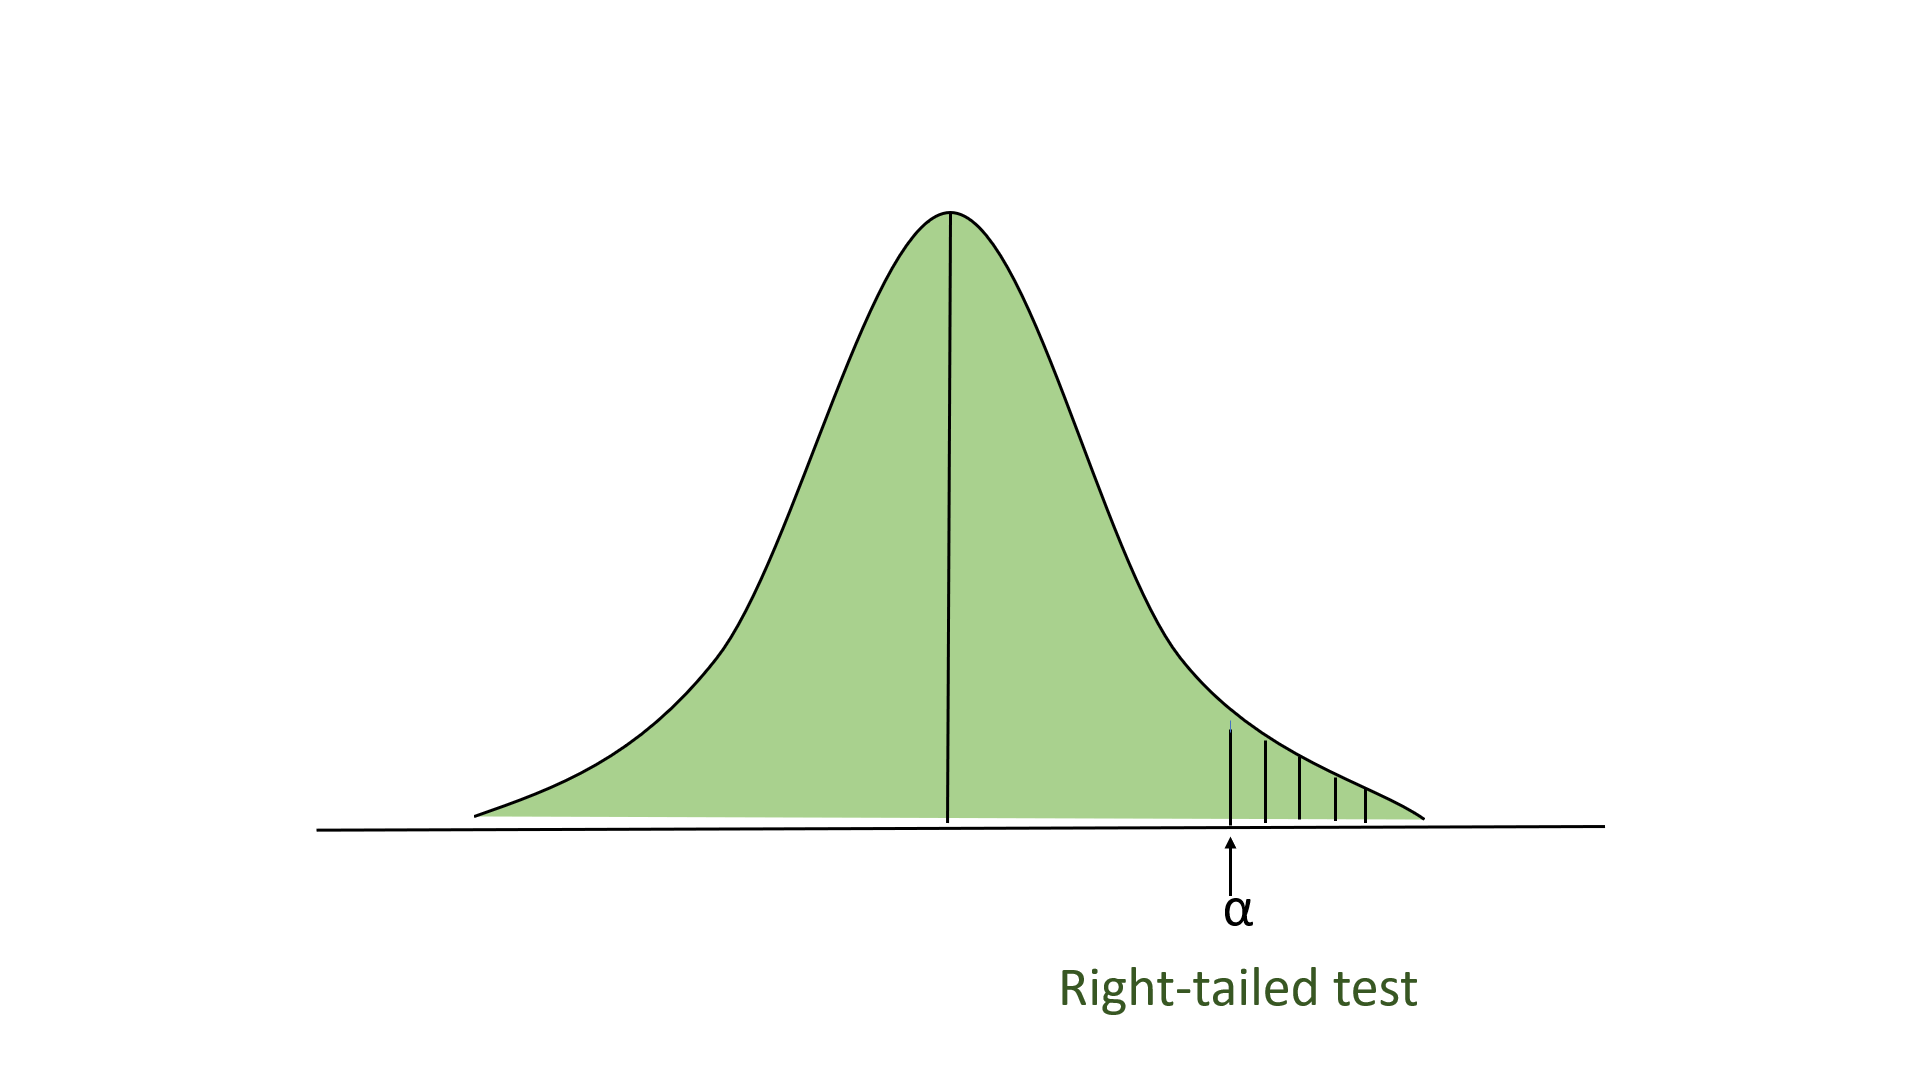

**Левосторонний тест**

Применяется если гипотеза $H_1$ имеет вид: $\mu < a$

Интервал согласия: $(z_{\alpha}; + \infty)$

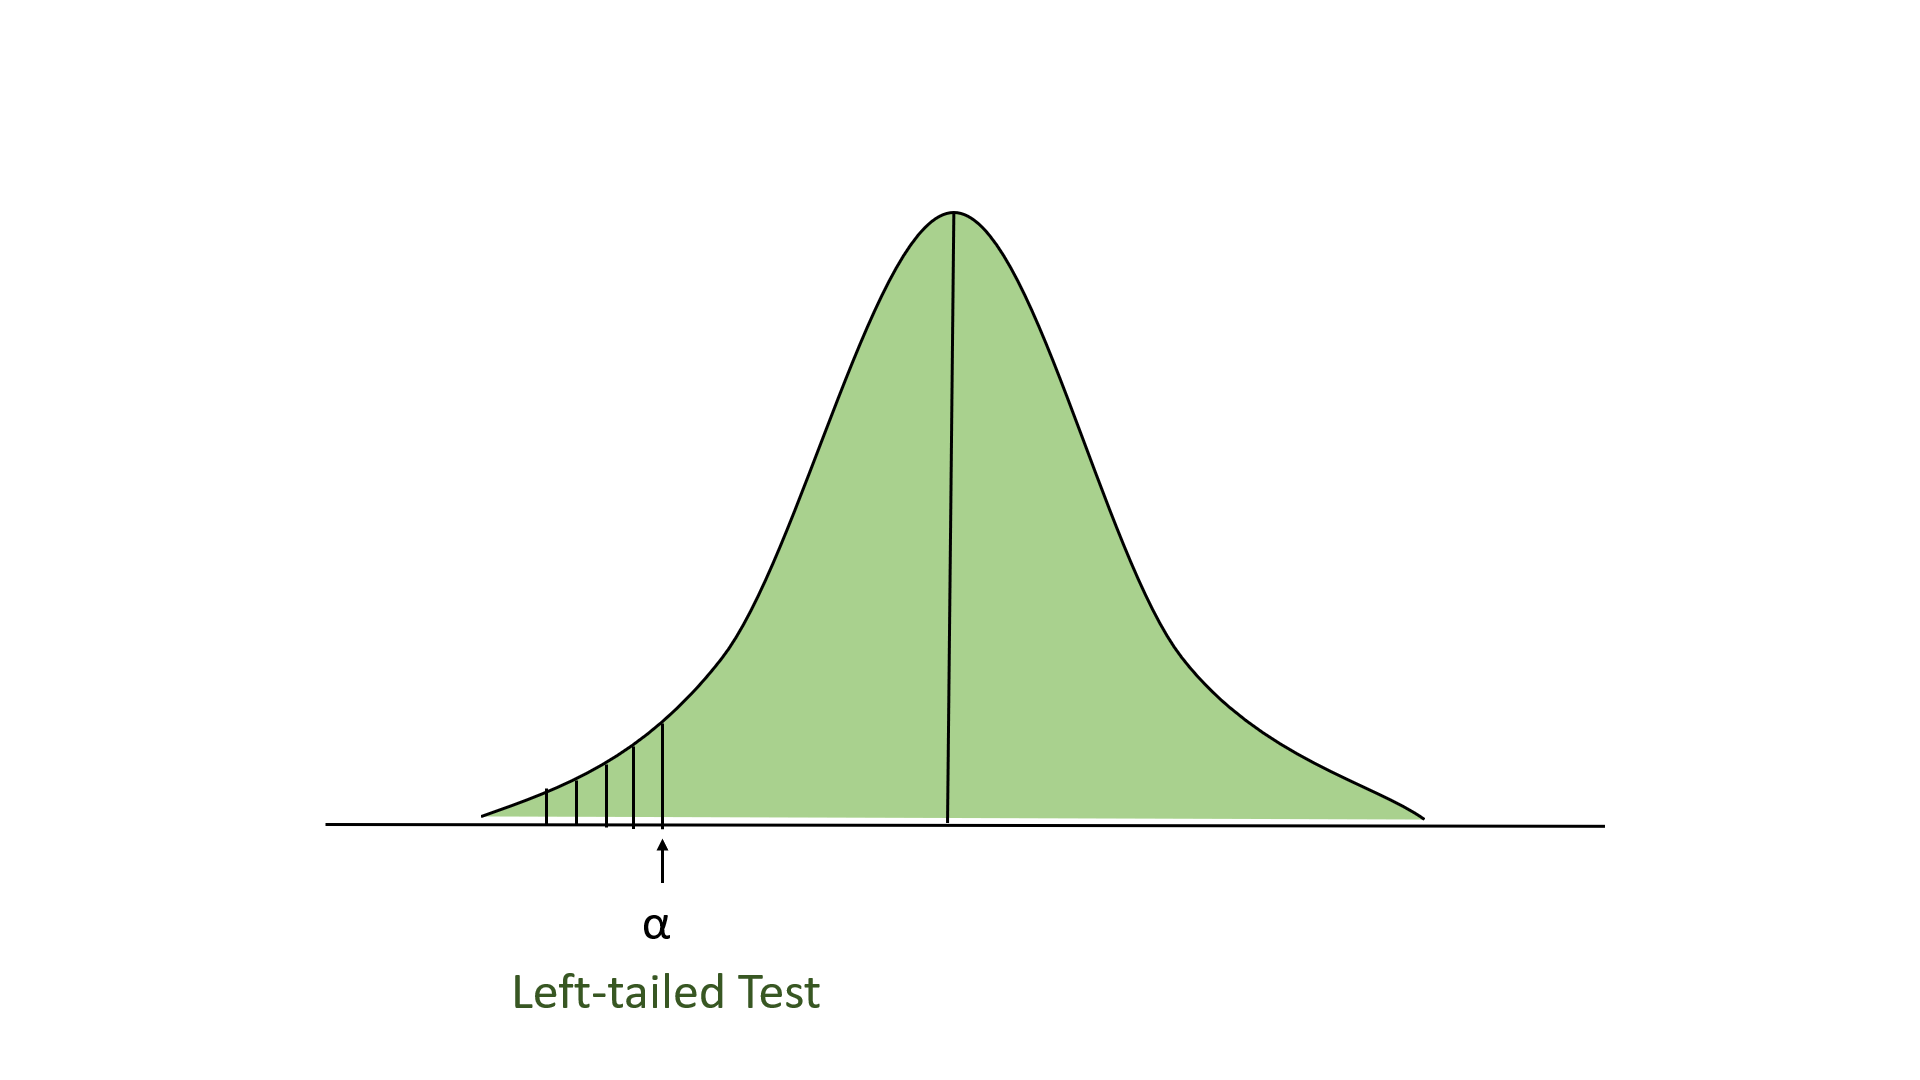

**Двусторонний тест**

Применяется если гипотеза $H_1$ имеет вид: $\mu \neq a$

Интервал согласия: $(z_{\frac{\alpha}{2}}; z_{1 -\frac{\alpha}{2}})$

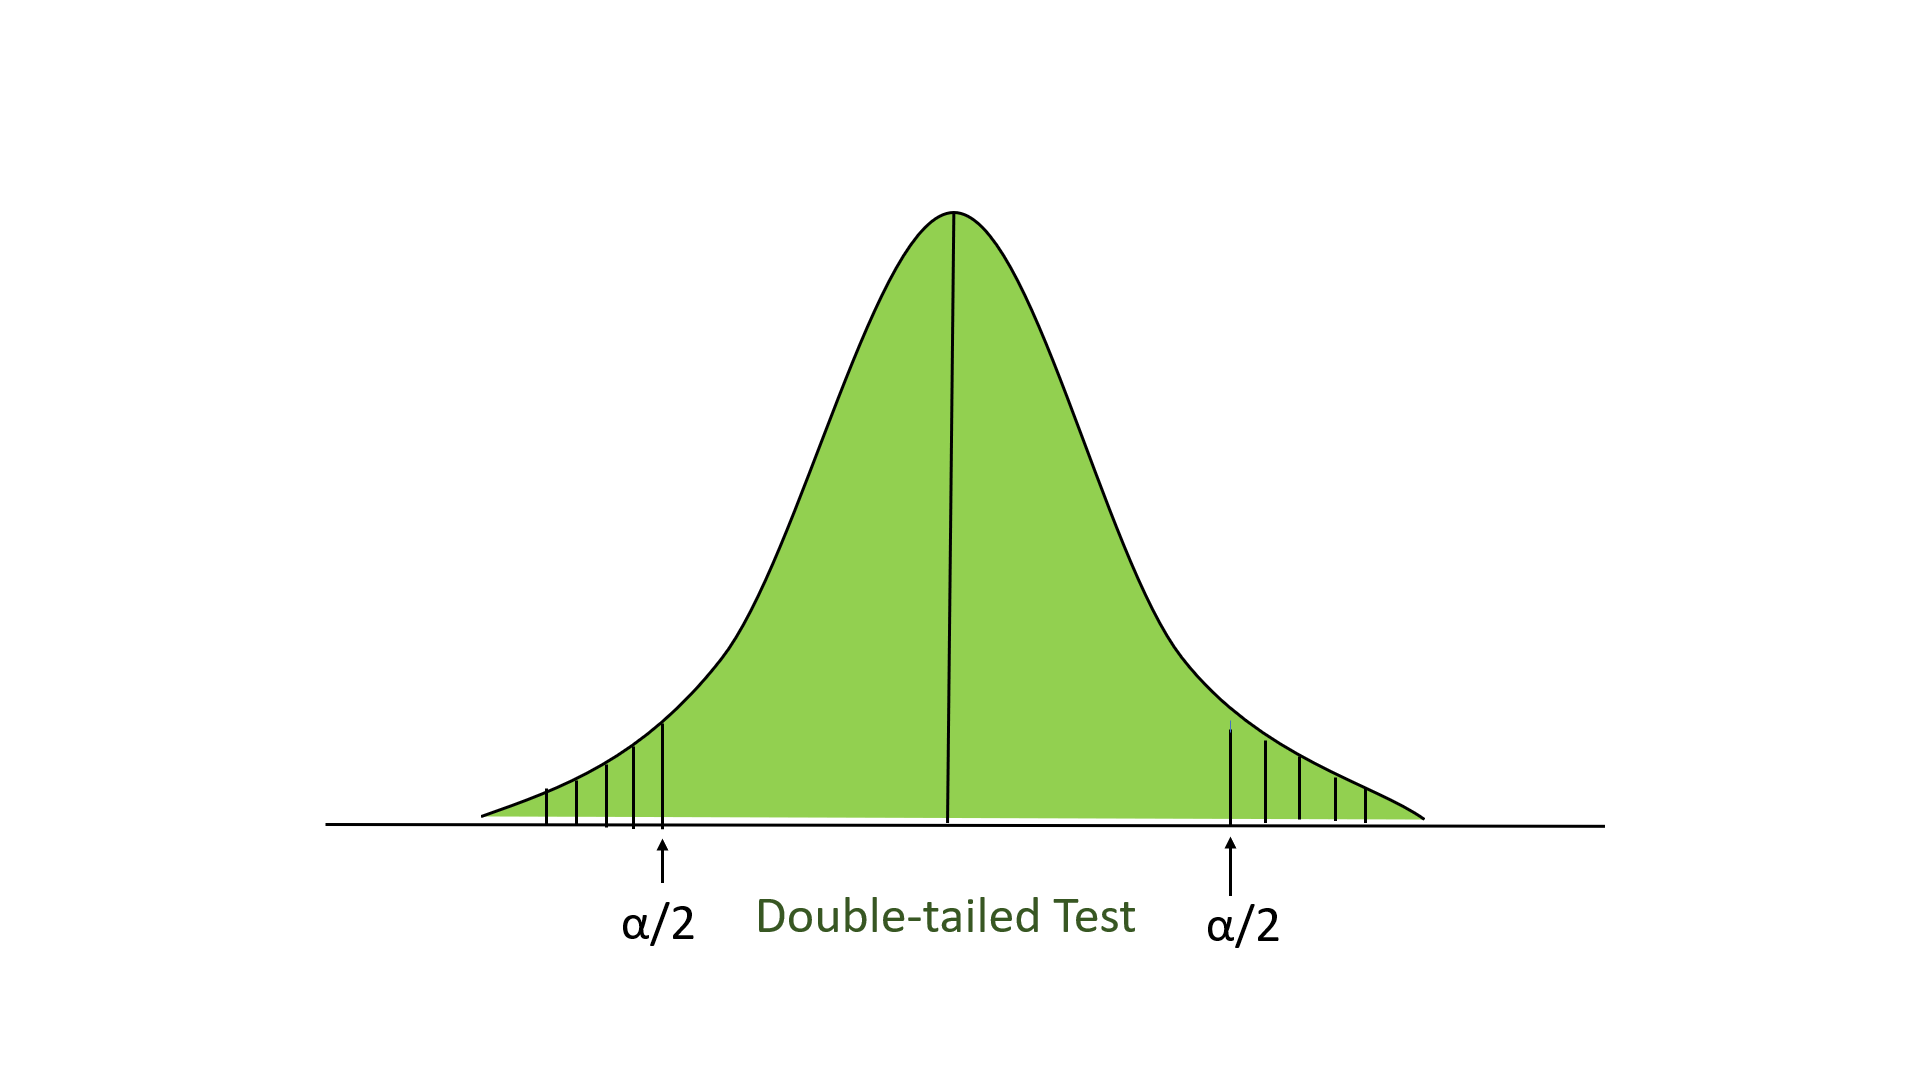

4. Смотрим куда попала наблюдаемая $Z$, посчитанная нами ранне и делаем выводы

**Идем ближе к практике**

Предположим, у нас есть 2 сайта с разным дизайном, и нам нужно проверить эффетивность этих двух сайт. Выяснить какой дизайн наиболеепривлекательный для клиента

In [167]:
import pandas as pd

In [168]:
df = pd.read_csv('new-site.tsv', sep='\t')
df

,site,dwell-time
0,0,2
1,0,48
2,0,15
3,0,16
4,0,38
...,...,...
295,0,22
296,0,7
297,1,144
298,0,89


In [169]:
site_0 = df[df['site'] == 0]['dwell-time']

**Задача 1**

Проверим следующую группу гипотез для сайтов с изначальным дизайном (0)

$$
\begin{aligned}
&H_0: \mu = 80 \\
&H_1: \mu > 80
\end{aligned}
$$

In [177]:
alpha = 0.05

x_mean = site_0.mean()
n = len(site_0)
sigma = 17

In [178]:
#solution

Так как наблюдаемое значение меньше критического, то наша гипотзе $H_0$ отвергается в пользу $H_1$

**Задача 2**

Напишите функцию, которая будет принимать на вход проверяемое $\mu$ уровень доверия, ст. откл, выборку, и тип теста (two-sided, left, right), которая будет выводить z критическое (или критические), z наблюдаемое, и отклоняется или принимается гипотеза $H_0$. Сравните ее с функцией *ztest* из модуля *statsmodels.stats.weightstats*

In [191]:
def z_test(mu: float, data: np.ndarray, sigma: float, test_type: str, alpha=0.05) -> None:
    """
    Функция для выполнения z-теста
    :param mu: значение математического ожидания, которые проверяется в нулевой гипотезе
    :param alpha: уровень доверия (по умолчанию alpha = 0.05)
    :param delta: стандартное отклонение всей совокупности
    :param test_type: тип выполняемого теста в зависимости от формулировки альтернативной гипотезы. Значения:two-sided, left, right
    """
    #solution
    

In [198]:
z_test(80, site_0, sigma, 'right')

z_obs: 7.881626424122707
z_crit: 1.6448536269514722
Нулевая гипотеза отклоняется


---

Теперь посмотрим как выполнять z-тест между двумя выборками. Мы имеем все те же входные параметры: мы знаем дисперсию совокупности и выборки - для счастья больше ничего не нужно, в крайнем случае их тоже можно оценить

$$
\begin{aligned}
& Z = \frac{X_{mean} - Y_{mean}}{\sigma_{xy}}
\end{aligned}
$$

$$
\begin{aligned}
& \sigma_{xy} = \sqrt{\frac{\sigma_x^{2}}{n_x} + \frac{\sigma_y^{2}}{n_y}}
\end{aligned}
$$

**Задача 3**

Вернемся к истории с двумя разными типами сайтов. Вы - уверенный в себе менеджер компании и принимаете решение, принимать ли 2 тип сайта. Поэтому ваши задачи выглядят во так:

*Задачи:*

1. Сформулируйте гипотезу с прикладной для вас, как менеджера, точки зрения 
2. Воспользутесь z-тестом, чтобы ее проверить
3. Сделайте вывод исходя из 1 пункта

In [ ]:
#solution

### T-тест

Проработав с прошлым примером, мы можем заметить, что на обновленном сайте выборка состоит всего лишь из 16 человек, что очень мало, чтобы сравнивать данные. Что мы можем сделать, чтобы их сравнить?

Есть распределение, которое позволить экстраполировать увеличенную неопределенность стандартной ошибки маленькой выборки на более большую, поэтому этот тест применяется когда выборка недостаточно большая 

**Рассмотрим случай одной выборки** 

Логика определения хвостов интервалов согласия такая же как и в z-тесте, но есть особенность в расчете

$$
\begin{aligned}
& t = \sqrt{N} \frac{X_{mean} - \mu}{s}
\end{aligned}
$$

$$
\begin{aligned}
& s = \sqrt{\frac{\sum\limits_{i=1}^{n}(X_i - X_{mean})^{2}}{n - 1}}
\end{aligned}
$$

Смотрим критическое значение t по n - 1 степеням свободы в таблице или находим через строчку кода

In [22]:
sps.t.ppf(0.95, df=28)

1.701130934265931

или

In [23]:
sps.t.interval(0.9, df=28) 

(-1.7011309342659318, 1.701130934265931)

**Задача 1**

Проверьте следующий набор гипотез для сайтов группы 1 

$$
\begin{aligned}
&H_0: \mu = 90 \\
&H_1: \mu > 90
\end{aligned}
$$

In [24]:
site_1 =  df[df['site'] == 1]['dwell-time']

In [1]:
#solution

----

Теперь посмотрим как пользовать t-тестом для двух независимых выборок с одинаковой дисперсией

$$
\begin{aligned}
& Z = \frac{X_{mean} - Y_{mean}}{s_{xy}\sqrt{\frac{1}{n_x}+ \frac{1}{n_y}}}
\end{aligned}
$$

$$
\begin{aligned}
    & s_{xy} = \sqrt{\frac{(n_x - 1)s_x^2 + (n_y - 1)s_y^2} {n_x + n_y - 2}}
\end{aligned}
$$

**Задача 2** 

1. Гипотеза сформулирована аналогично такой же задаче с z-тестом
2. Реализуйте функцию для t-теста
3. сделайте выводы
4. Какой тест подходит для сравнения двух этих выборок z-тест или t-тест? Почему?

In [ ]:
#solution 

### Полезные почиташки и источники:

1. Прикольная статейка с хабра, откуда был взят датасет с сайтами: https://habr.com/ru/post/556852/
2. Классный гайд по scipy и небольше интро про работу с распределениями: https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html
3. Если вы интуитивно хотите понимать как работают распределения и откуда берется t-распределение: https://habr.com/ru/post/559062/